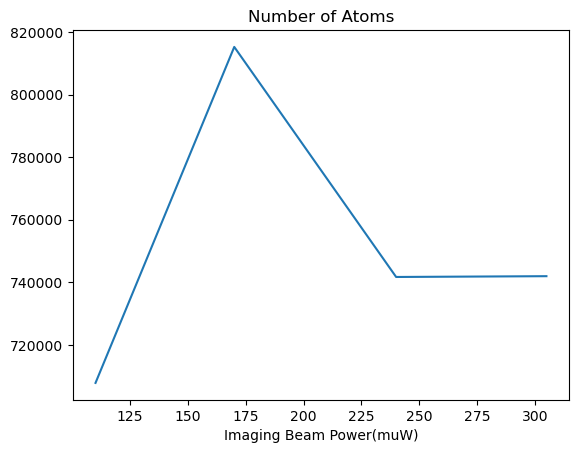

In [68]:
import csv
import numpy as np
import matplotlib.pyplot as plt


#Imaging Power
N=[]
n=[]
cur=[]
t=[]
d=[]
fN=[]
Power=[]

with open('BEAM50.0_300.0.csv', 'r') as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        N.append(int(row['number_of_atoms']))
        fN.append(int(row['fit_number_atoms']))
        n.append(int(row['central_atoms']))
        cur.append(float(row['current']))
        # t.append(float(row['MOT_TIME']))
        d.append(float(row['density']))
        Power.append(float(row['Imag_beam_Power']))



plt.plot([*Power],[*fN])
plt.title('Number of Atoms')
plt.xlabel('Imaging Beam Power(muW)')
plt.show()

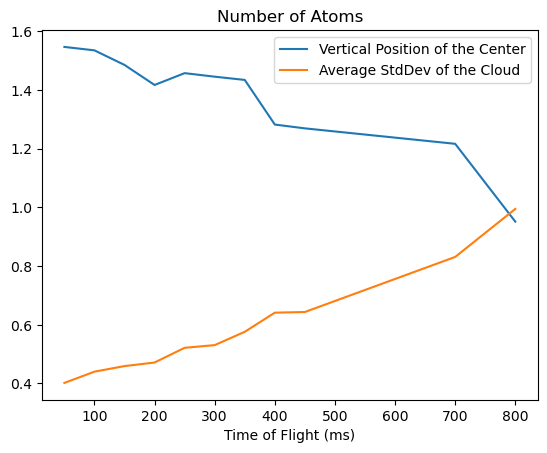

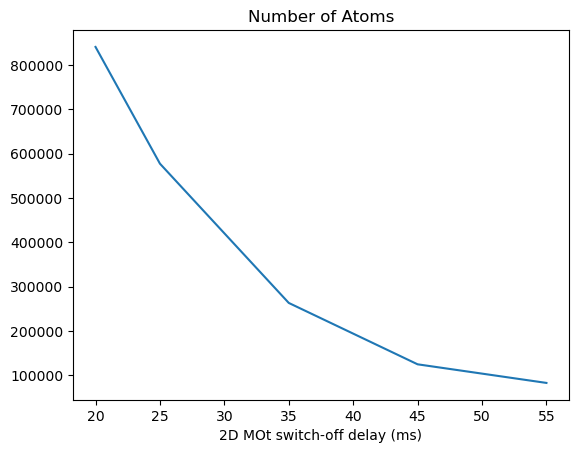

In [124]:
#MOT TOF
yo=[47.6,47.24,45.71, 43.61, 44.85,44.48,44.14,39.46,39.06,37.44,29.28]
yo=[i*32.5*1e-3 for i in yo]
sigma_x=[15.29,16.85,17.4,17.51,10.95,19.33,13.12,22.53,21.84,23.45,31.89]
sigma_y=[8.49,9.12,9.83,10.69,19.88,12.64,21.36,16.47,17.53,27.54,29.28]
sigma_a=[np.sqrt(i**2/2+j**2/2) for i, j in zip(sigma_x,sigma_y)]
sigma_a=[a*(32.5*1e-3) for a in sigma_a]
TOF=[50,100,150,200,250,300,350,400, 450,700,800]
threeD_delay=[]
fN=[]

with open('TOF50.2.csv', 'r') as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        # yo.append(int(row['yo']))
        # sigma_x.append(int(row['sigma_x']))
        # TOF.append(float(row['TOF']))
        threeD_delay.append(float(row['threeD_delay']))
        fN.append(int(row['fit_number_atoms']))        

plt.plot(TOF,yo)
plt.plot(TOF,sigma_a)

plt.title('Number of Atoms')
plt.xlabel('Time of Flight (ms)')

plt.legend(['Vertical Position of the Center', 'Average StdDev of the Cloud'])
plt.show()

threeD_delay=[t*1e-3 for t in threeD_delay]
plt.plot(threeD_delay,fN)

plt.title('Number of Atoms')
plt.xlabel('2D MOt switch-off delay (ms)')

plt.show()


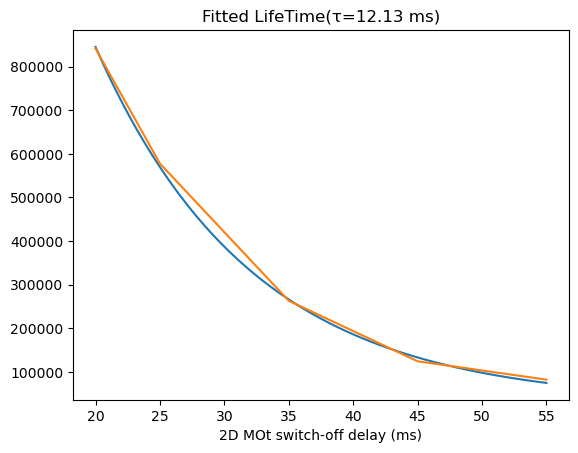

In [142]:
#LifeTIME

from scipy.optimize import curve_fit

# Define a 2D Gaussian function
def expo(t, amplitude, tau, Co):
    return Co+ amplitude * np.exp(-(t/tau))


# Fit the 2D Gaussian to the image
initial_guess = (1e+6, 55, 0)  # Initial guess for amplitude, xo, yo, sigma_x, sigma_y, theta
low=[0,0,0]
upper=[float('inf'),float('inf'),float('inf')]
bounds=[low, upper]
popt, _ = curve_fit(expo, threeD_delay, fN, p0=initial_guess, bounds=bounds)

# Extract the parameters
amplitude, tau, Co = popt

time = np.linspace(np.min(threeD_delay), np.max(threeD_delay), int(np.max(threeD_delay)))

plt.plot(time,expo(time,amplitude,tau,Co))
plt.plot(threeD_delay,fN)
plt.title('Fitted LifeTime(τ=%s ms)'%(int(tau*100)/100))
plt.xlabel('2D MOt switch-off delay (ms)')

plt.show()


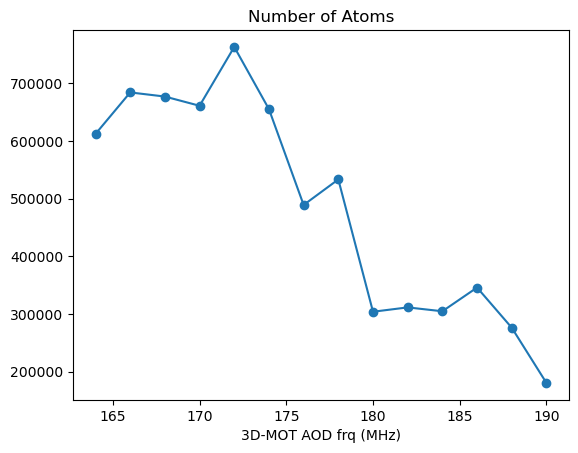

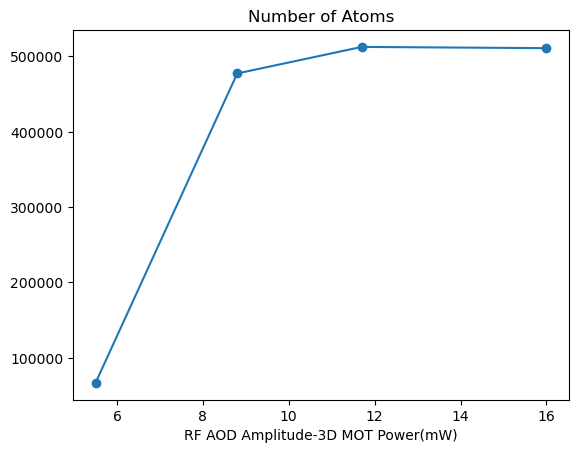

In [200]:
#3D MOT AOD Power and Frequency

fN=[]
FRQ=[]
N=[]
Po=[]
with open('MOTFRQ.csv', 'r') as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        N.append(int(row['number_of_atoms']))
        # sigma_x.append(int(row['sigma_x']))
        # TOF.append(float(row['TOF']))
        FRQ.append(float(row['MOT_FRQ']))
        # Po.append(float(row['Power_MOT']))
        
        fN.append(int(row['fit_number_atoms']))        

plt.plot(FRQ,fN,'-o')
# plt.plot(FRQ,N)


plt.title('Number of Atoms')
plt.xlabel('3D-MOT AOD frq (MHz)')

plt.show()


fN=[]
FRQ=[]
N=[]
Po=[]
with open('MOTpower.csv', 'r') as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        N.append(int(row['number_of_atoms']))
        # sigma_x.append(int(row['sigma_x']))
        # TOF.append(float(row['TOF']))
        FRQ.append(float(row['MOT_FRQ']))
        Po.append(float(row['Power_MOT']))
        
        fN.append(int(row['fit_number_atoms']))     

plt.plot(Po,fN, '-o')
plt.title('Number of Atoms')
plt.xlabel('RF AOD Amplitude-3D MOT Power(mW)')

plt.show()

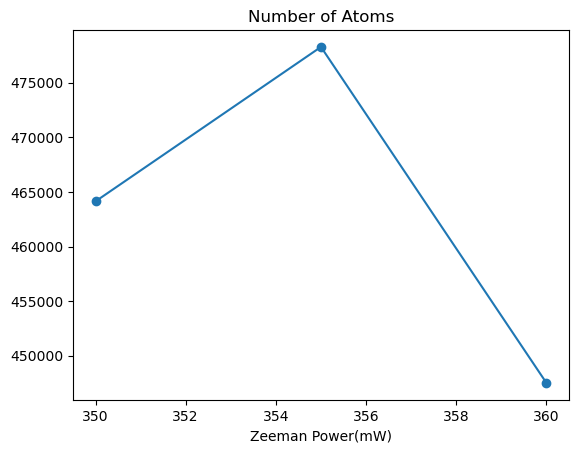

In [204]:
#ZEEMAN Power and Frequency

fN=[]
FRQ=[]
N=[]
Po=[]
Z=[]

with open('MOTZeeman.csv', 'r') as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        N.append(int(row['number_of_atoms']))
        FRQ.append(float(row['MOT_FRQ']))
        Z.append(float(row['Zeeman']))
        
        fN.append(int(row['fit_number_atoms'])) 


plt.plot(Z,fN, '-o')
# plt.plot(FRQ,N)


plt.title('Number of Atoms')
plt.xlabel('Zeeman Power(mW)')

plt.show()    